## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [253]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_8800\1162196871.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [254]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [256]:
df.describe(include="all")

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [257]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

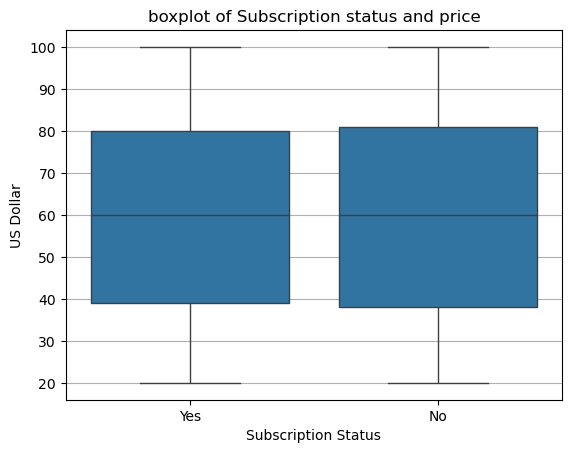

In [258]:
plt.grid(True)
plt.title("boxplot of Subscription status and price")
plt.ylabel("US Dollar")
sns.boxplot(data = df, x = "Subscription Status", y= "Purchase Amount (USD)");

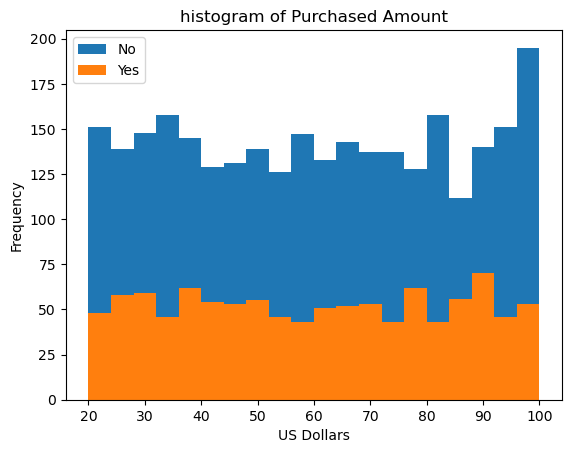

In [259]:
yes_data = df[df["Subscription Status"] == "Yes"]
no_data = df[df["Subscription Status"] == "No"]
plt.title("histogram of Purchased Amount")
plt.ylabel("Frequency")
plt.xlabel("US Dollars")
plt.hist(no_data["Purchase Amount (USD)"], bins=20,label="No")
plt.hist(yes_data["Purchase Amount (USD)"], bins=20,label="Yes")
plt.legend()
plt.show()


**insight**
* the people who are not Subscribed are the people that payes the most
* it seems that there are no outliers

### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

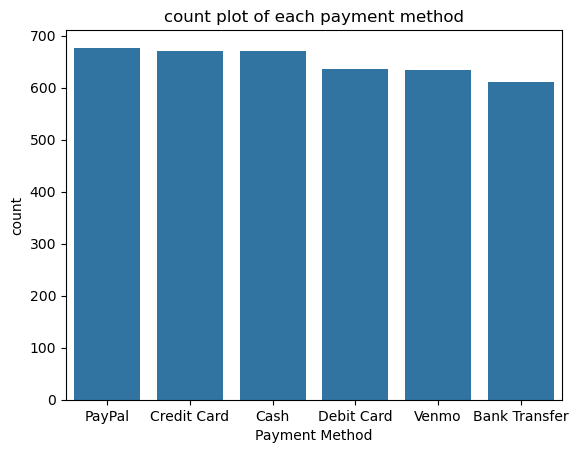

In [260]:
plt.title("count plot of each payment method")
sns.countplot(data = df, x = "Payment Method", order = df["Payment Method"].value_counts().index);

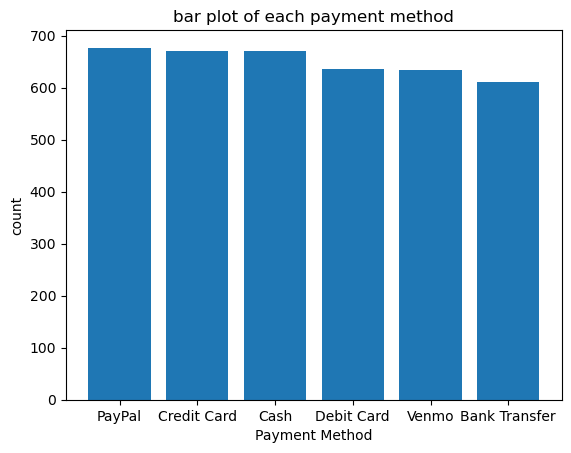

In [261]:
x = df["Payment Method"].value_counts().index
y = df["Payment Method"].value_counts().values
plt.title("bar plot of each payment method")
plt.xlabel("Payment Method")
plt.ylabel("count")
plt.bar(x, y);

**insight**
* most people prefere to pay using either **paypal** or **credit card** while the least people pay using **bank transfer**

### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

In [262]:
x = df["Season"].value_counts().index
y_male = df[df["Gender"] == "Male"]
y_male = y_male["Season"].value_counts().values
y_female = df[df["Gender"] == "Female"]
y_female = y_female["Season"].value_counts().values

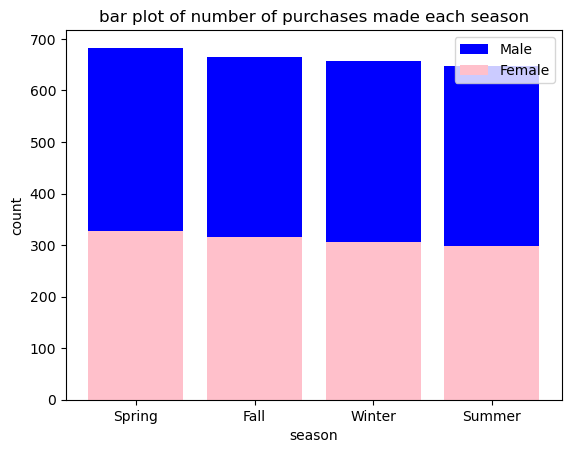

In [263]:
plt.title("bar plot of number of purchases made each season")
plt.xlabel("season")
plt.ylabel("count")
plt.bar(x, y_male, label = "Male", color="blue")
plt.bar(x, y_female, label ="Female", color="pink")
plt.legend();

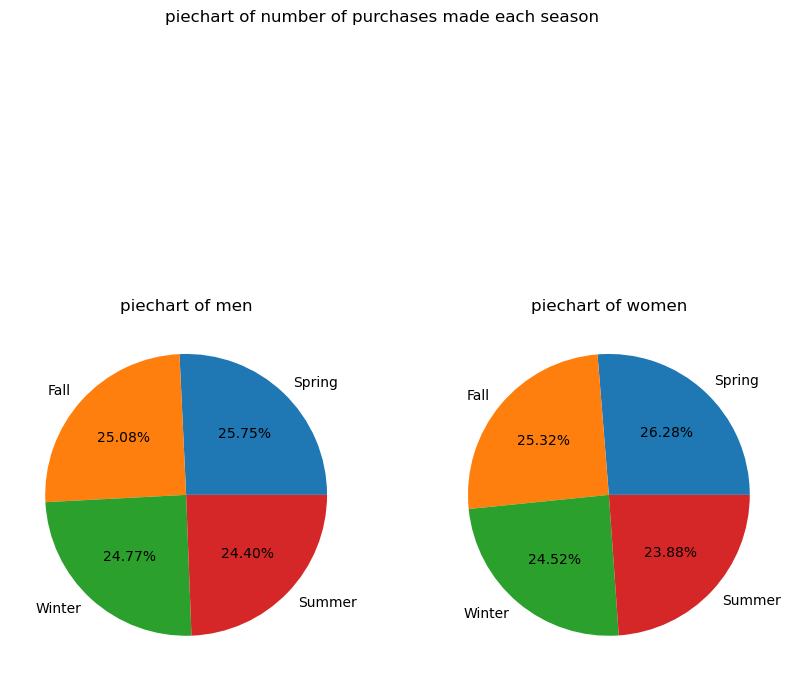

In [264]:
plt.figure(figsize=(10,10))
plt.suptitle("piechart of number of purchases made each season ")
plt.subplot(1,2,1)
plt.title("piechart of men")
plt.pie(x = y_male, labels=x,autopct='%1.2f%%');
plt.subplot(1,2,2)
plt.title("piechart of women")
plt.pie(x = y_female, labels = x, autopct='%1.2f%%');


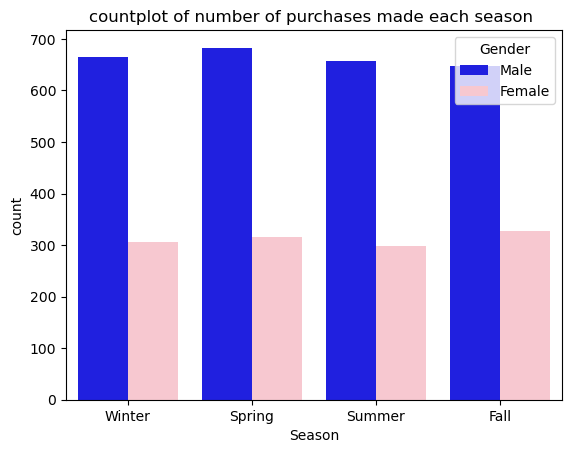

In [265]:
plt.title("countplot of number of purchases made each season ")
sns.countplot(data = df, x = "Season", hue = "Gender", palette=["blue", "pink"]);

**insight**
* most purchases are made in **spring** while the least are made in **summer**
* most of the purchases made all aroud the year are made by **male** customers

### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

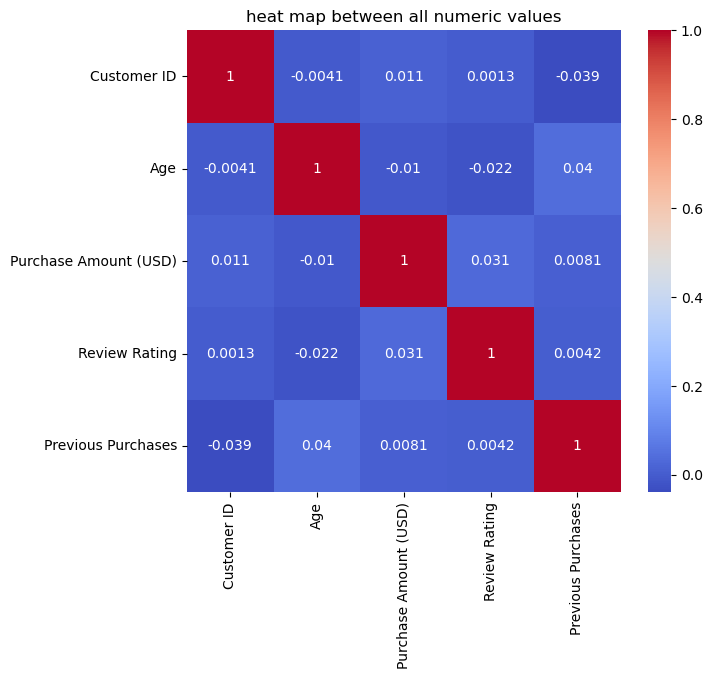

In [266]:
plt.figure(figsize=(7,6))
plt.title("heat map between all numeric values")
corr = df.select_dtypes(["int64","float64"]).corr()
sns.heatmap(corr, cmap="coolwarm", annot=True);

**insights**
* there is a slight direct relation between the **age** and the **previous purchaes** and a negative one with **review rating**
* aside from the mentioed above there is **no strong correlations exist** between all the numerical values

### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

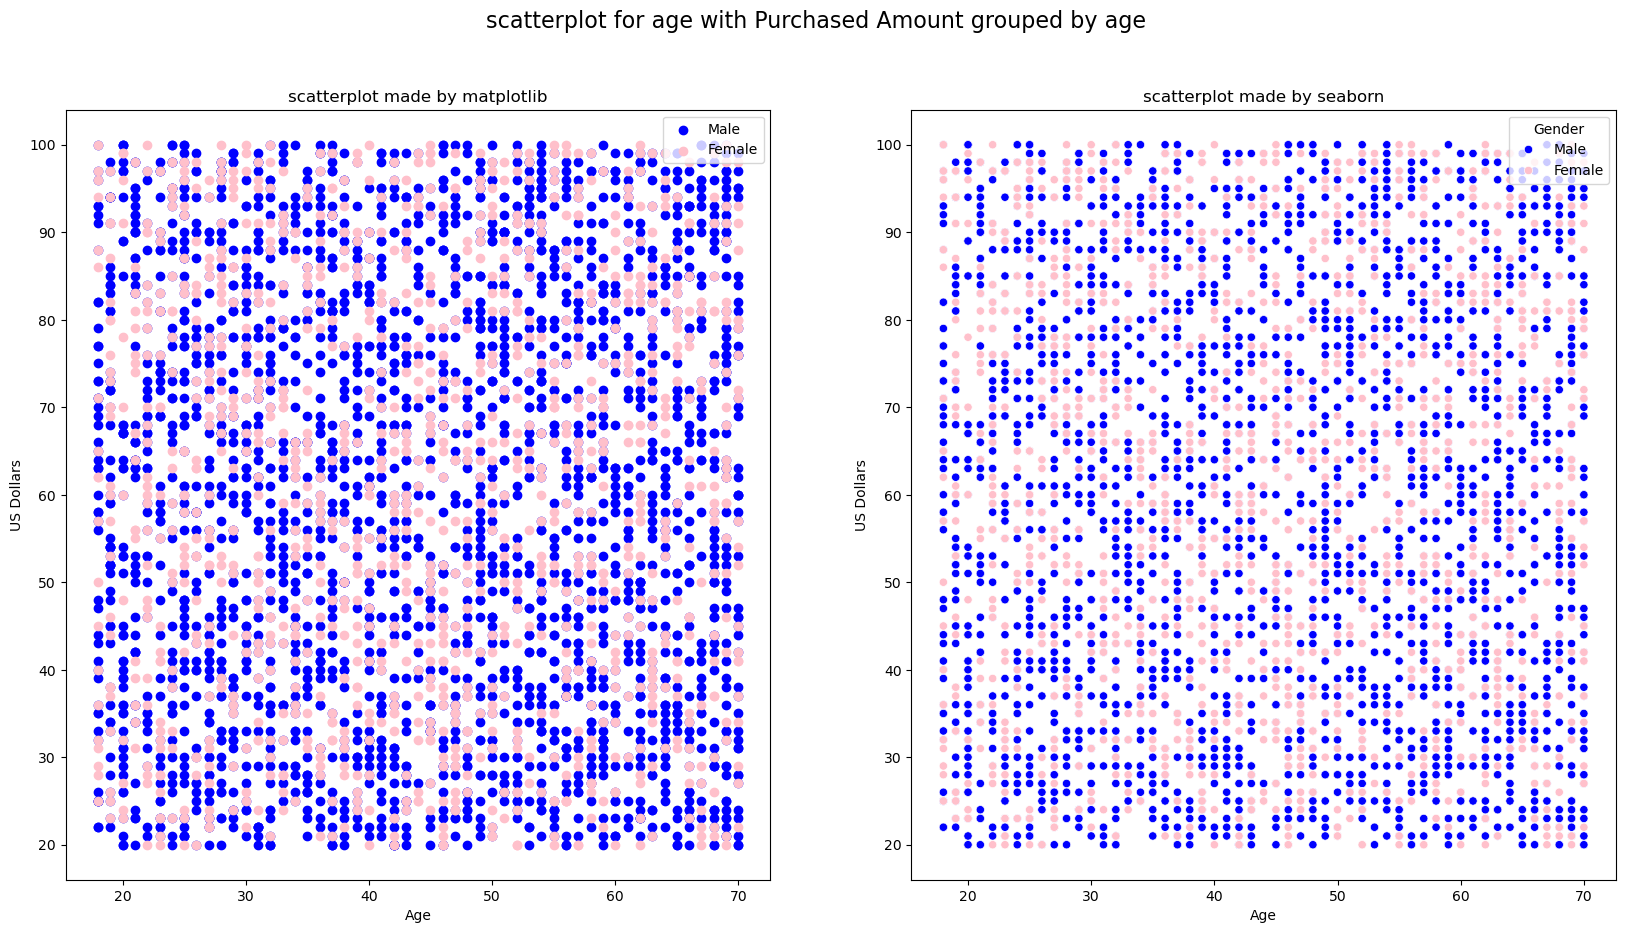

In [267]:
plt.figure(figsize = (20,10))
plt.suptitle("scatterplot for age with Purchased Amount grouped by age", fontsize=16)
male_data = df[df["Gender"] == "Male"]
female_data = df[df["Gender"] == "Female"]
plt.subplot(1, 2, 1)
plt.title("scatterplot made by matplotlib")
plt.xlabel("Age")
plt.ylabel("US Dollars")
plt.scatter(x = male_data["Age"], y = male_data["Purchase Amount (USD)"], c="blue", label = "Male" )
plt.scatter(x = female_data["Age"], y = female_data["Purchase Amount (USD)"], c="pink", label = "Female")
plt.legend(loc="upper right")
plt.subplot(1, 2, 2)

plt.title("scatterplot made by seaborn")
plt.ylabel("US Dollars")
sns.scatterplot(data = df,x = "Age", y = "Purchase Amount (USD)", hue = "Gender",palette = ["blue","pink"]);

**insight**
* there is a no direct relationship between **age** and **Purchased Amount**
* the points representing males are slightly more than representing wemen

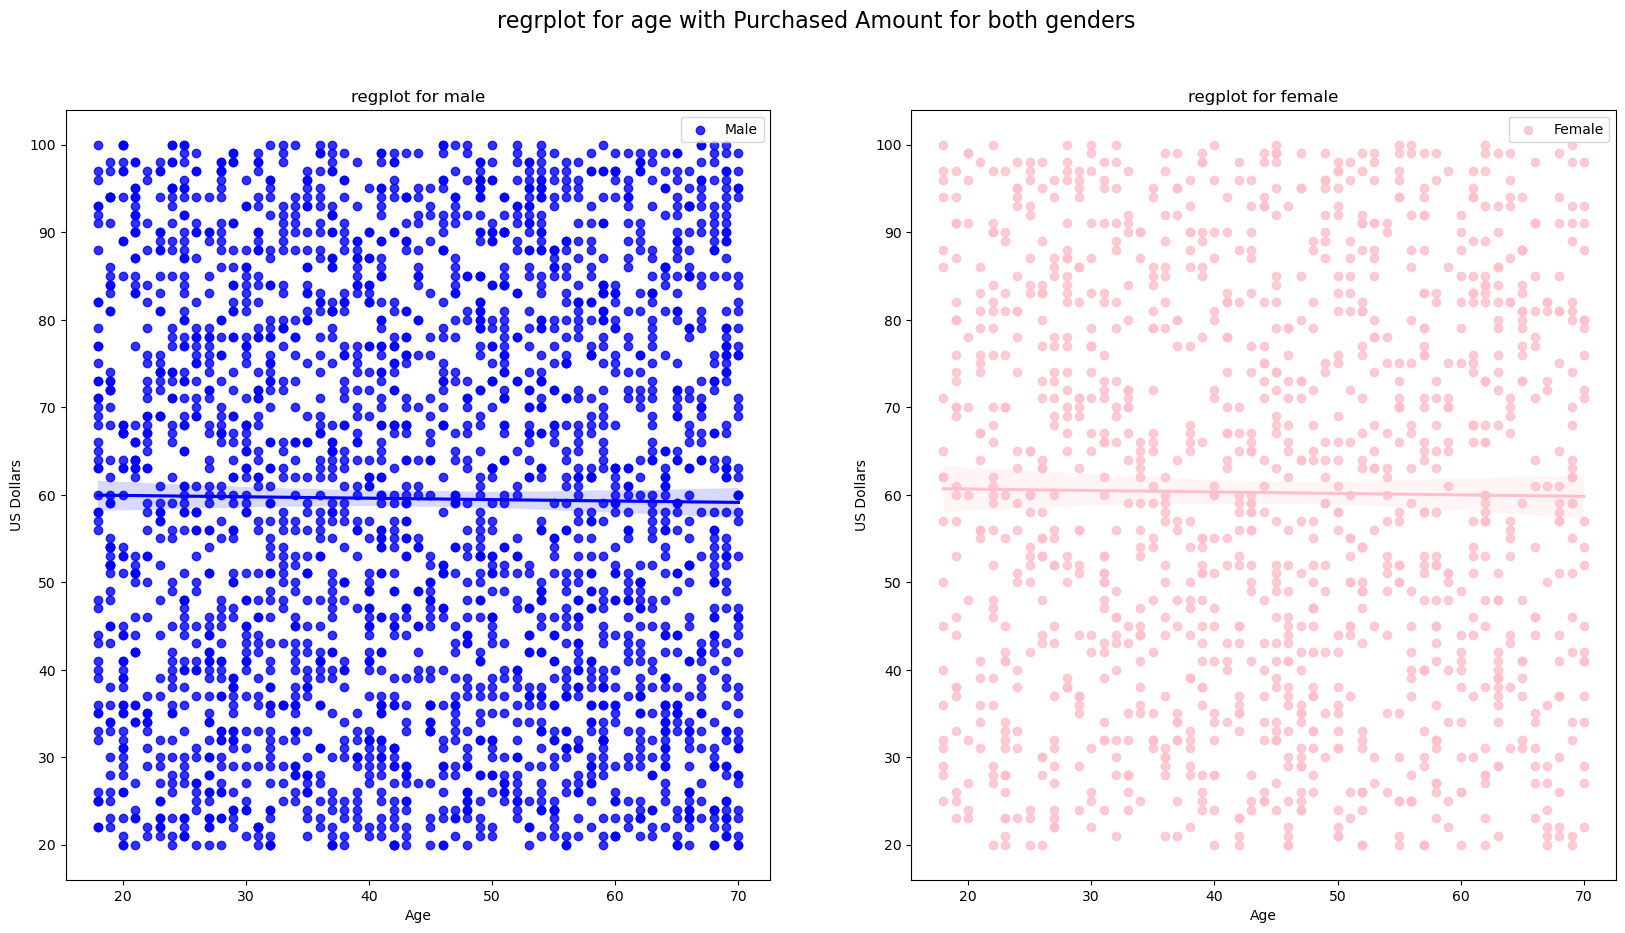

In [268]:
plt.figure(figsize=(20,10))
plt.suptitle("regrplot for age with Purchased Amount for both genders", fontsize=16)
plt.subplot(1, 2, 1)
df_male = df[df["Gender"] == "Male"]
plt.title("regplot for male")
sns.regplot(x="Age", y = "Purchase Amount (USD)", data=df_male,color="blue", label="Male")
plt.ylabel("US Dollars")
plt.legend();
plt.subplot(1,2,2)
plt.title("regplot for female")
df_female = df[df["Gender"]=="Female"]
sns.regplot(x="Age", y ="Purchase Amount (USD)", data = df_female, color="pink", label="Female")
plt.ylabel("US Dollars")
plt.legend();

**insight**
* there is a small inverse relationship between **age** and **Purchased Amount** for both genders
* the regline for both genders is nearly identical

### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

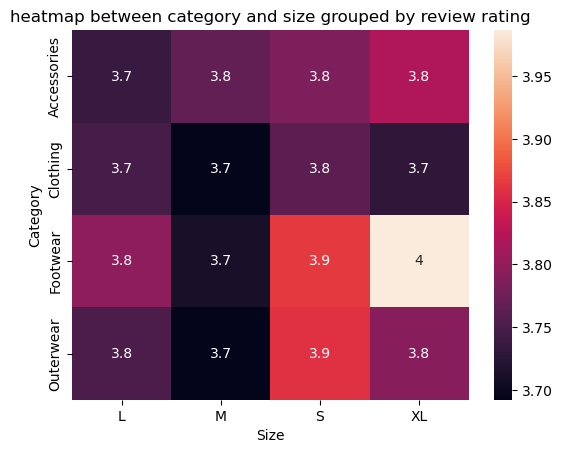

In [269]:
pivot = df.pivot_table(values="Review Rating", index = "Category", columns=["Size"], aggfunc="mean")
plt.title("heatmap between category and size grouped by review rating")
sns.heatmap(pivot, annot=True);


**insight**
* the heighest average of items are present in **footwere** and **outwear** categories with sizes **S** and **XL**

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

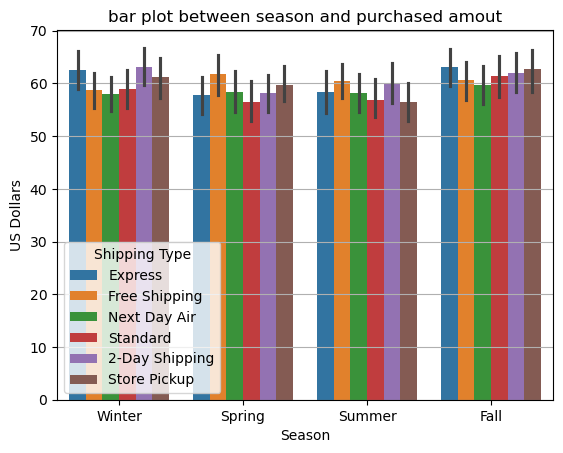

In [270]:
plt.title("bar plot between season and purchased amout")
plt.grid(True)
plt.ylabel("US Dollars")
sns.barplot(data = df, x = "Season", y = "Purchase Amount (USD)", hue = "Shipping Type");

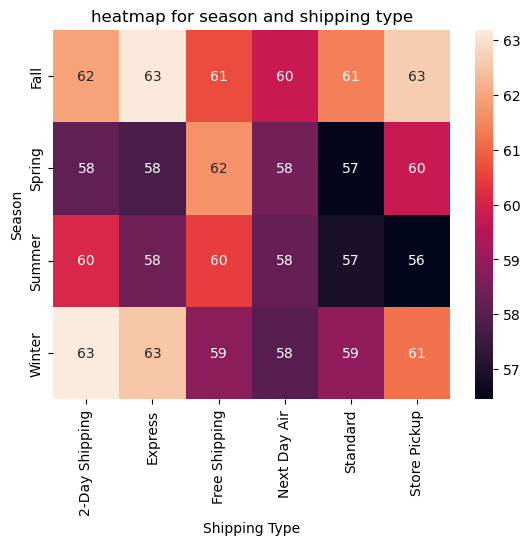

In [271]:
pivot = df.pivot_table(values = "Purchase Amount (USD)", index = "Season", columns = "Shipping Type", aggfunc = "mean")
plt.title("heatmap for season and shipping type")
sns.heatmap(pivot, annot = True);

**insight**
* the heighest combination of **Season** and **Shipping Type** giving the most money are **(fall and express)** followed by **(winter and 2-day shipping)** then **(fall and store pickup)**  

### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

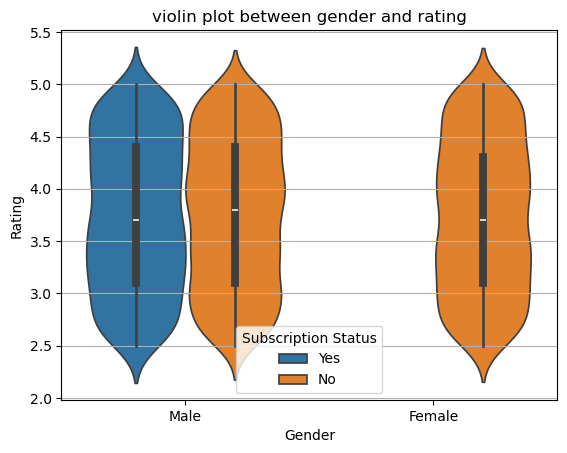

In [272]:
plt.grid(True)
plt.title("violin plot between gender and rating")
plt.ylabel("Rating")
sns.violinplot(data=df,x="Gender", y="Review Rating", hue="Subscription Status" );

**insight**
* the **review rating fo**r unsubscribed male is slightly less than the one for subscribed male
* **there are no subscribed females**

### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

In [273]:
top_items = df.groupby("Item Purchased")["Purchase Amount (USD)"].sum().sort_values(ascending=False).head(5)

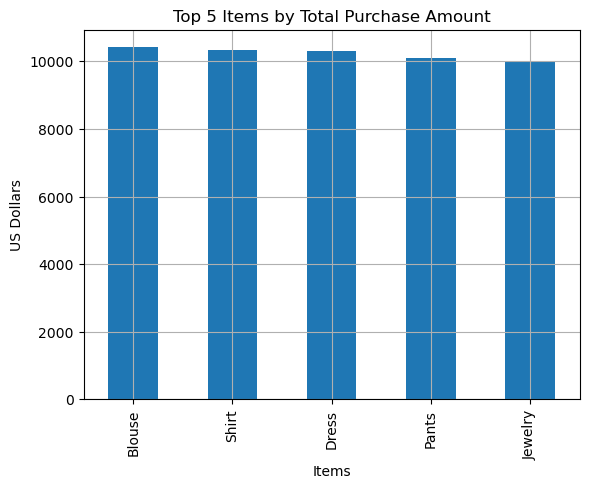

In [274]:

top_items.plot(kind="bar")
plt.grid(True)
plt.title("Top 5 Items by Total Purchase Amount")
plt.ylabel("US Dollars")
plt.xlabel("Items");

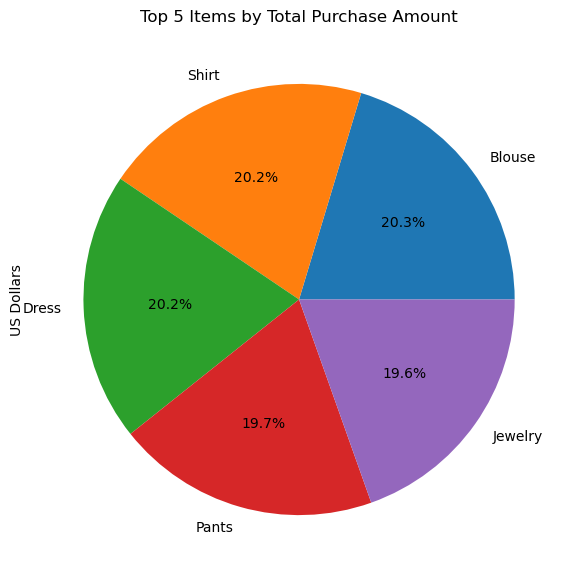

In [275]:
plt.figure(figsize=(7,7))
top_items.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("US Dollars")
plt.title("Top 5 Items by Total Purchase Amount");

**insight**
* the most item purchased is **Blouse** followed by **Shirt** and **Dress** togeather having nearly the same value

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

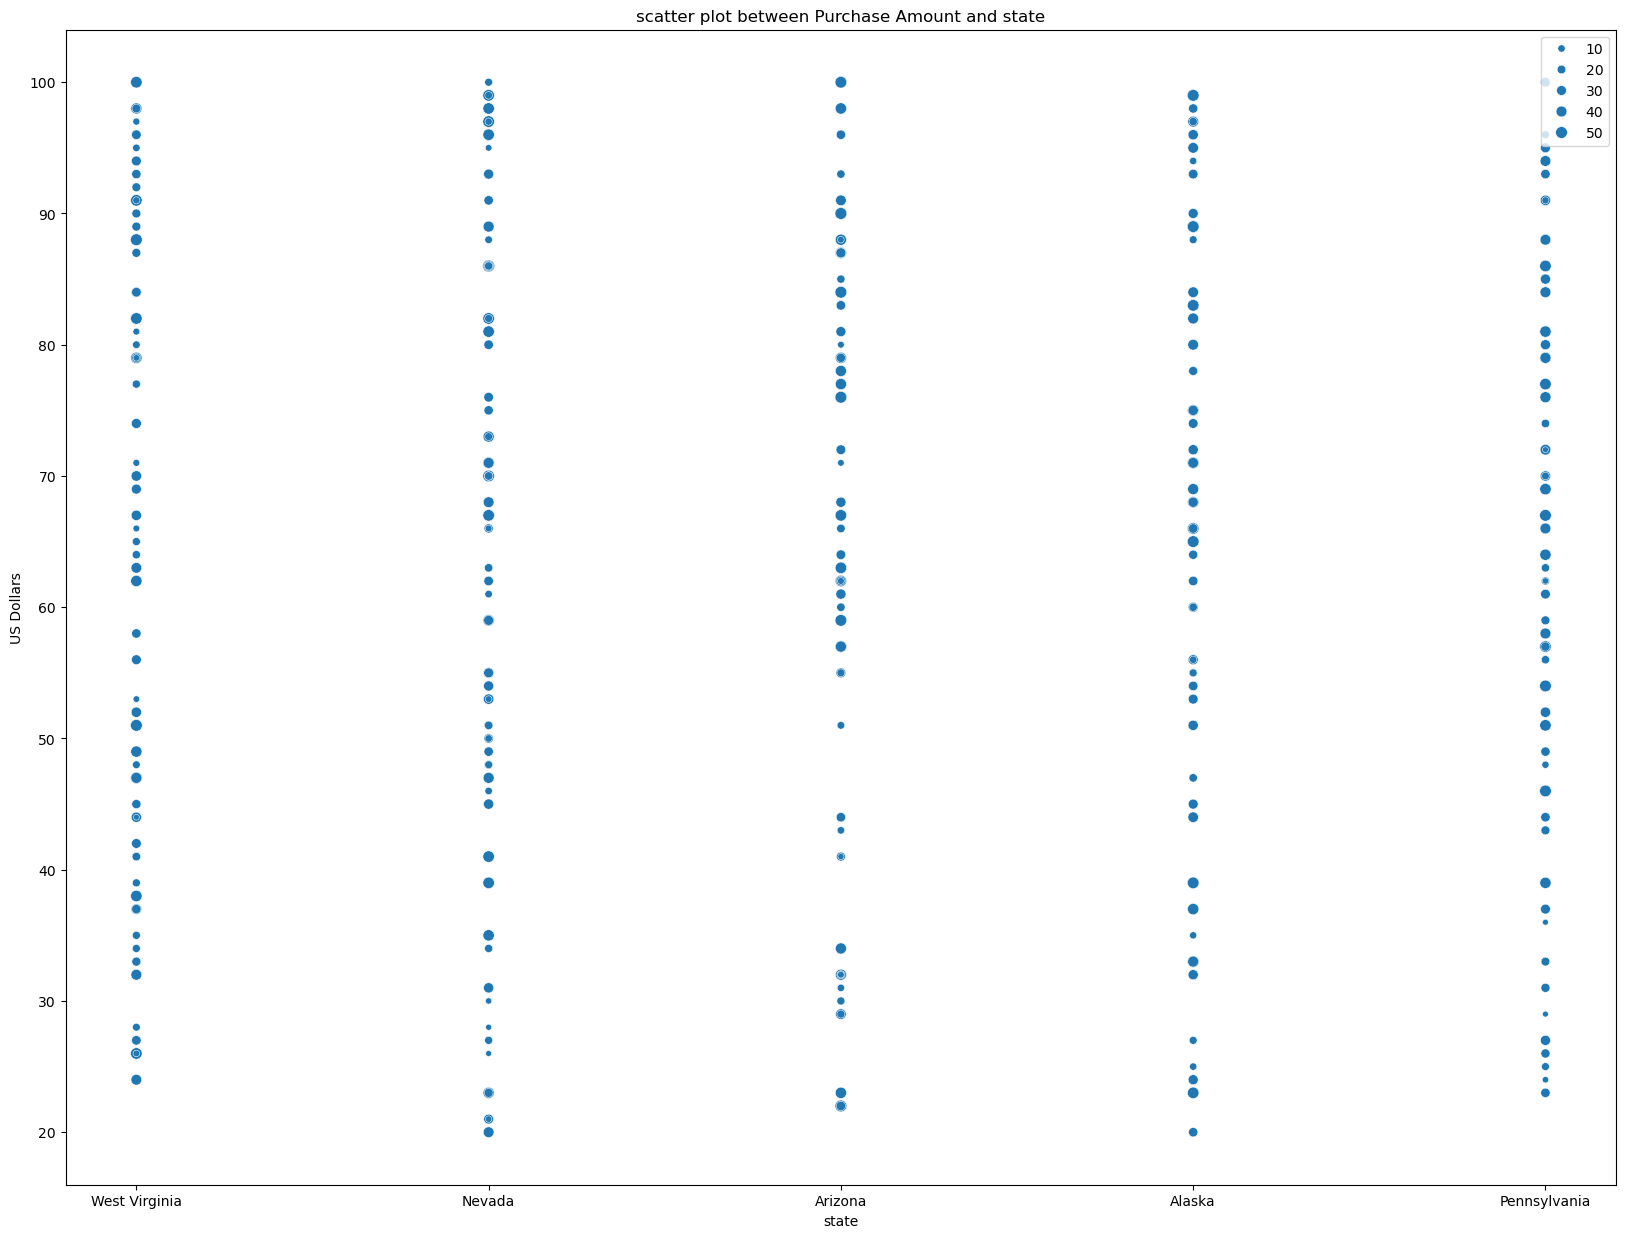

In [276]:
plt.figure(figsize=(20,15))
plt.title("scatter plot between Purchase Amount and state")
df_loaction = df.groupby("Location")["Purchase Amount (USD)"].mean().sort_values(ascending=False).head().index
df_loaction = df[df["Location"].isin(df_loaction)]
plt.xlabel("state")
plt.ylabel("US Dollars")
sns.scatterplot(data=df_loaction, x="Location", y="Purchase Amount (USD)", size="Previous Purchases" )
plt.legend(loc="upper right");

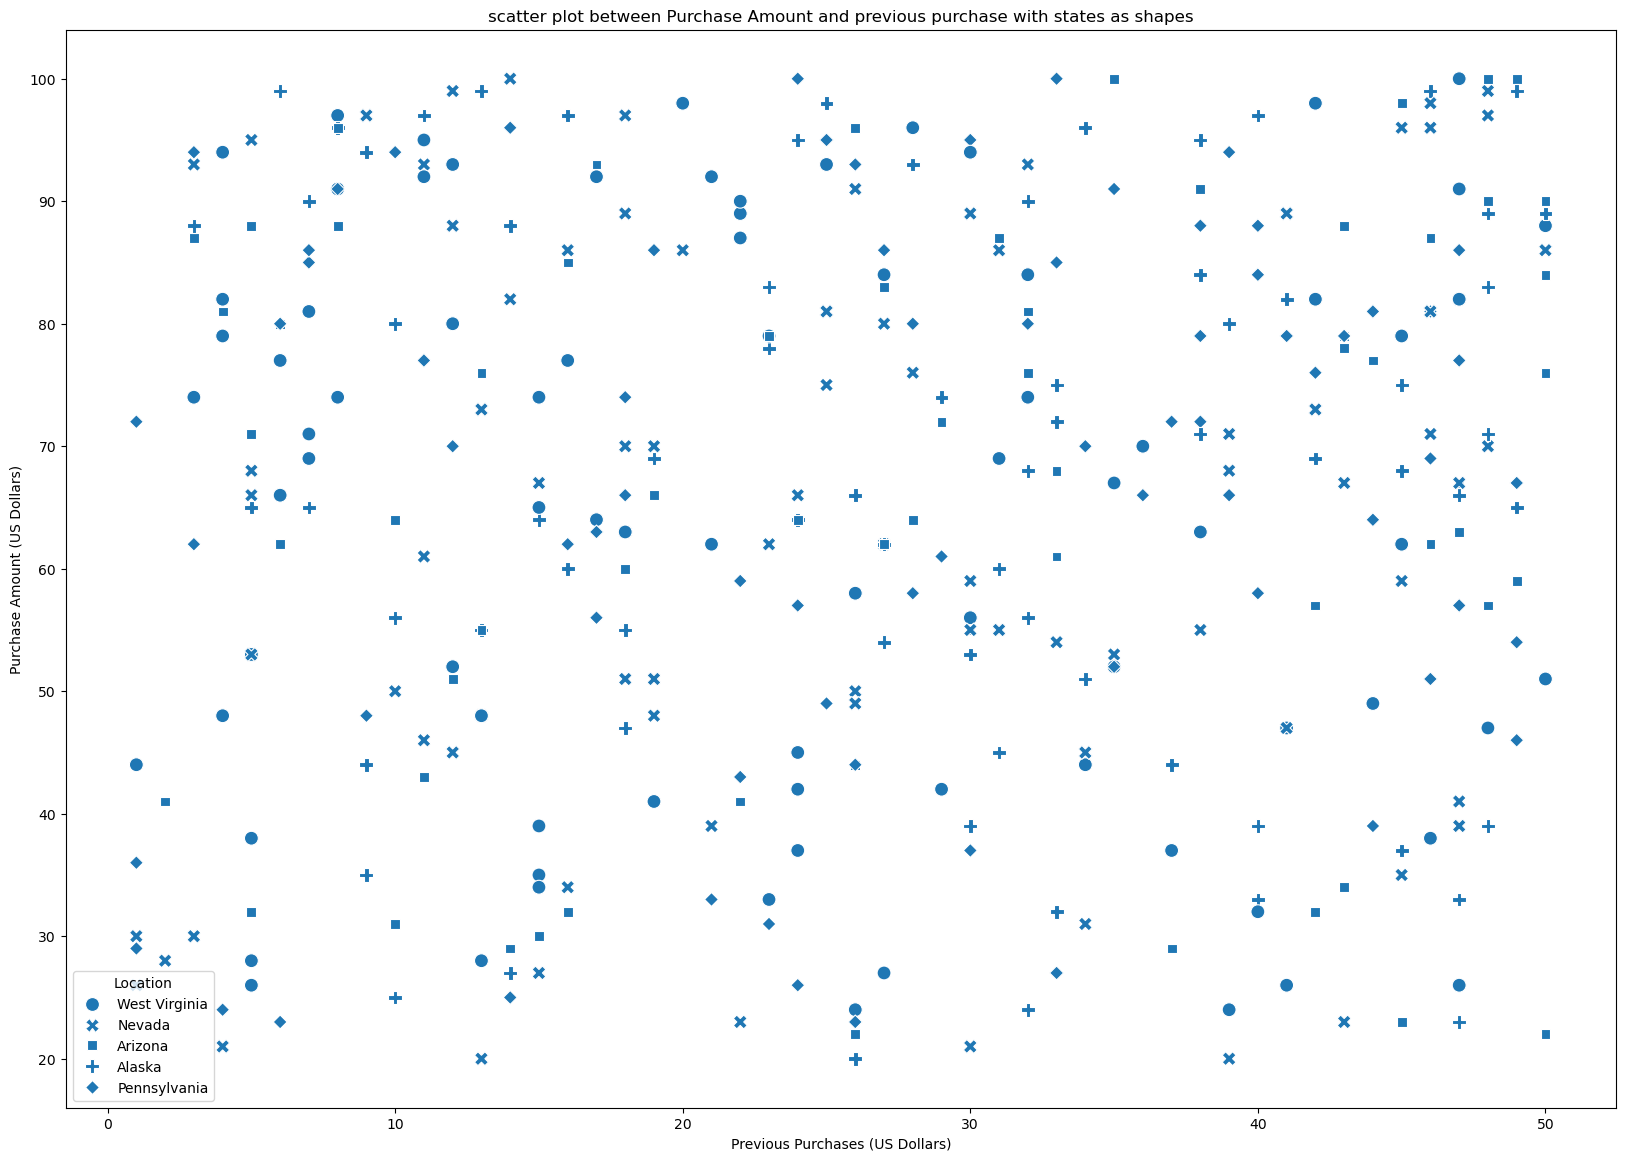

In [277]:
plt.figure(figsize=(20,14))
plt.title("scatter plot between Purchase Amount and previous purchase with states as shapes")
plt.ylabel("Purchase Amount (US Dollars)")
plt.xlabel("Previous Purchases (US Dollars)")

sns.scatterplot(data=df_loaction, x="Previous Purchases", y="Purchase Amount (USD)", style="Location",s=100 );

**insight**
* the state with the heighest average Purchase Amount is **nevada** followed by **west verginia**
* there is a direct relationship between **Previous Amount** and **Purchase Amount** with location having no effect

### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

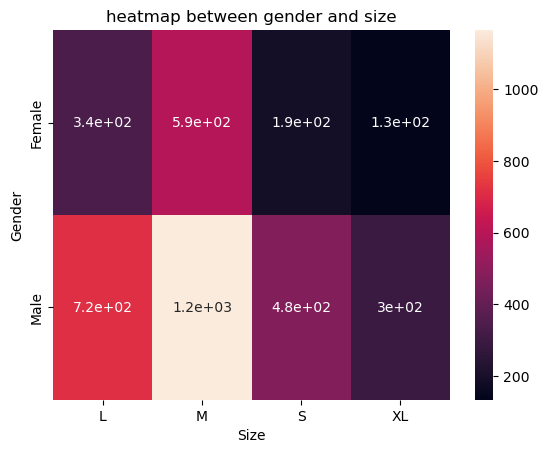

In [278]:
tab= pd.crosstab(df["Gender"], df["Size"])
plt.title("heatmap between gender and size")
sns.heatmap(tab, annot=True);

**insight**
* **Males** have more item counts than **Females** across all sizes
* the most common is **Male** with size **M** while the least common is **Female** with **XL** 

### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

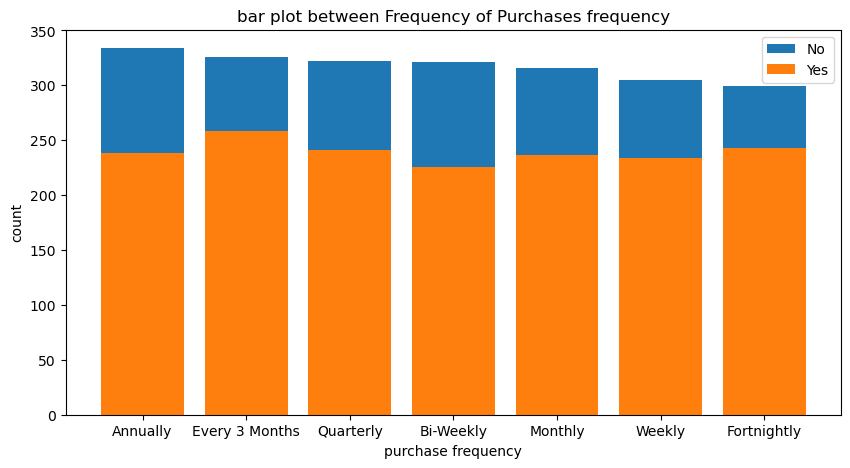

In [279]:
plt.figure(figsize=(10,5))
df_yes = df[df["Promo Code Used"] == "Yes"]
df_no = df[df["Promo Code Used"] == "No"]
yes_x = df_yes["Frequency of Purchases"].value_counts().index
yes_y = df_yes["Frequency of Purchases"].value_counts().values
no_x = df_no["Frequency of Purchases"].value_counts().index
no_y = df_no["Frequency of Purchases"].value_counts().values
plt.title("bar plot between Frequency of Purchases frequency")
plt.xlabel("purchase frequency")
plt.ylabel("count")
plt.bar(x=no_x,height=no_y, label = "No")
plt.bar(x=yes_x,height=yes_y, label = "Yes")
plt.legend();

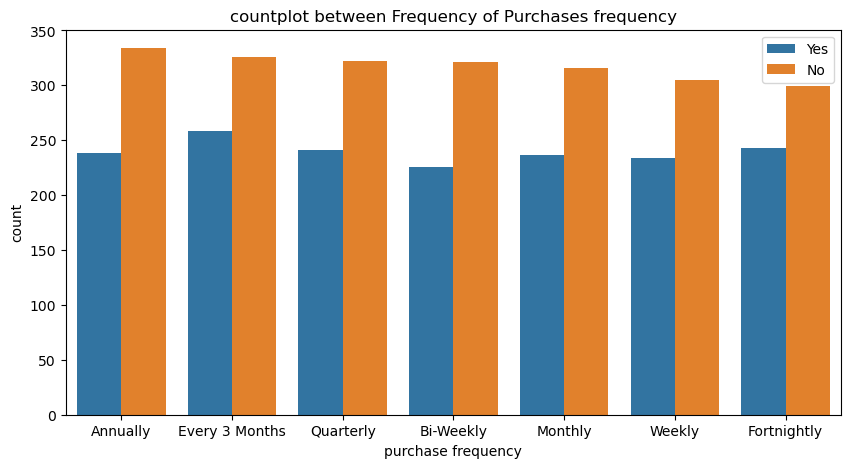

In [280]:
plt.figure(figsize=(10,5))
plt.xlabel("purchase frequency")
sns.countplot(data = df, x="Frequency of Purchases", hue="Promo Code Used",order = no_x)
plt.legend(loc ="upper right")
plt.title("countplot between Frequency of Purchases frequency");

**insight** 
* there is no direct relationship between **Frequency of Purchases** and **use of promo code** as no one affect the other

### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

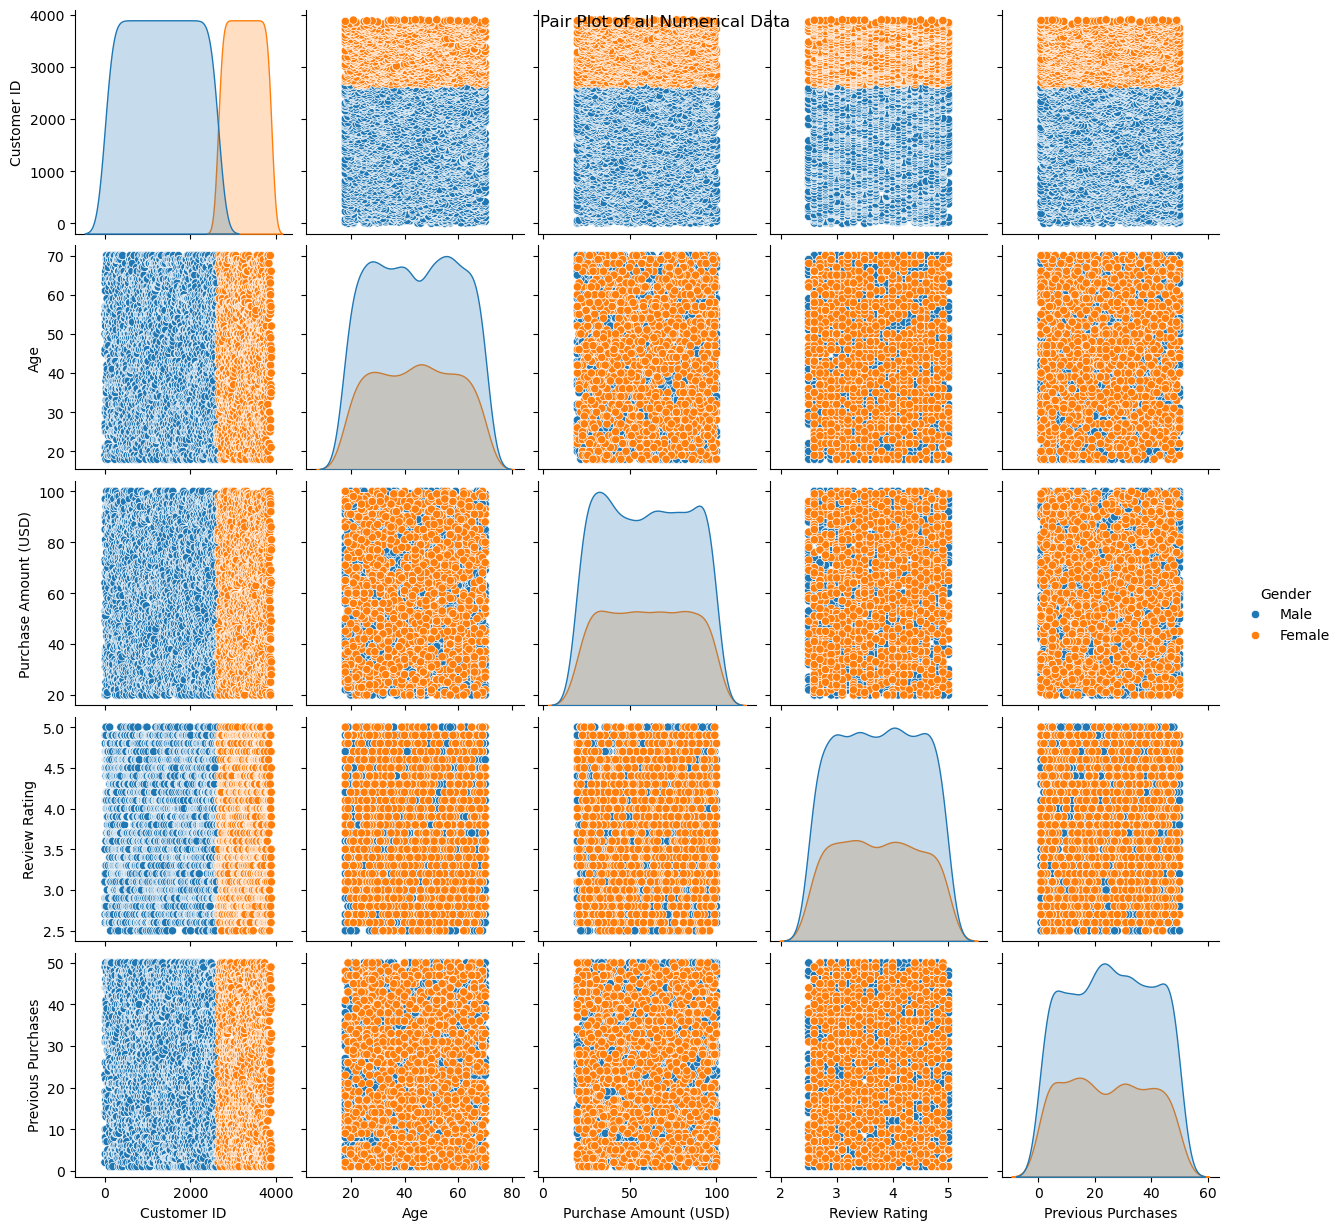

In [281]:
graph =sns.pairplot(data = df, hue="Gender")
graph.fig.suptitle("Pair Plot of all Numerical Data");

**insight**
* Female customers tend to have heigher customer id than Males